In [1]:
from astropy.time import Time
import spiceypy as spy
import numpy as np


In [2]:
deg = np.pi/180
rad = 1/deg

Descargar Kernels necesarios

In [3]:

!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/naif0012.tls -O naif0012.tls
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/pck00010.tpc -O pck00010.tpc
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/earth_fixed.tf -O earth_fixed.tf
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/earth_720101_230601.bpc -O earth_720101_230601.bpc
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/de438.bsp -O de438.bsp
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/earth_latest_high_prec.bpc -O earth_latest_high_prec.bpc

--2023-09-11 17:36:31--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/naif0012.tls
Resolviendo naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.78.232.95
Conectando con naif.jpl.nasa.gov (naif.jpl.nasa.gov)[137.78.232.95]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 5257 (5,1K) [text/plain]
Guardando como: ‘naif0012.tls’

naif0012.tls        100%[===================>]   5,13K  --.-KB/s    en 0s      

2023-09-11 17:36:31 (178 MB/s) - ‘naif0012.tls’ guardado [5257/5257]

--2023-09-11 17:36:31--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/pck00010.tpc
Resolviendo naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.78.232.95
Conectando con naif.jpl.nasa.gov (naif.jpl.nasa.gov)[137.78.232.95]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 126143 (123K) [text/plain]
Guardando como: ‘pck00010.tpc’

pck00010.tpc        100%[===================>] 123,19K   374KB/s    en 0,3s    

2023-09-11 17:36:32 (374 KB/s) - ‘

Abrir Kernels

In [4]:
spy.furnsh(['naif0012.tls', 'pck00010.tpc', 'earth_fixed.tf', 'earth_720101_230601.bpc', 'de438.bsp', 'earth_latest_high_prec.bpc'])

'ITRF93' is a frame ``fixed'' to the Earth's crust. It provides a high precision model for the orientation of the Earth with respect to J2000. In SPICE this is also a PCK type frame but its orientation is provided in a binary PCK file.

17  ECLIPJ2000  Ecliptic coordinates based upon the J2000 frame.

In [5]:
def dec2hex(ang):
  """ang in degrees
  """
  sgn = np.sign(ang)
  deg = abs(ang)
  min = (deg - int(deg))*60
  sec = (min - int(min))*60
  return sgn*int(deg),int(min),sec

def Geo2Ecliptic(lon, lat, alt, date):
    """
    lon: (float) [°]
    lat: (float) [°]
    alt: (float) km
    date: (str) '2000-08-16 00:00:00'
    """
    deg = np.pi/180

    lon = lon*deg
    lat = lat*deg

    n, props = spy.bodvrd('399','RADII',3)
    RE_spice = props[0]
    RP_spice = props[2]
    f_spice = (RE_spice-RP_spice)/RE_spice

    et = spy.utc2et(date)
    r_earth_fixed = spy.georec(lon, lat, alt, RE_spice, f_spice)
    M_itrf2ecl = spy.pxform('ITRF93', 'ECLIPJ2000', et)
    r_earth_ecl = spy.mxv(M_itrf2ecl, r_earth_fixed)

    return r_earth_ecl

### Prubea: posición ISS

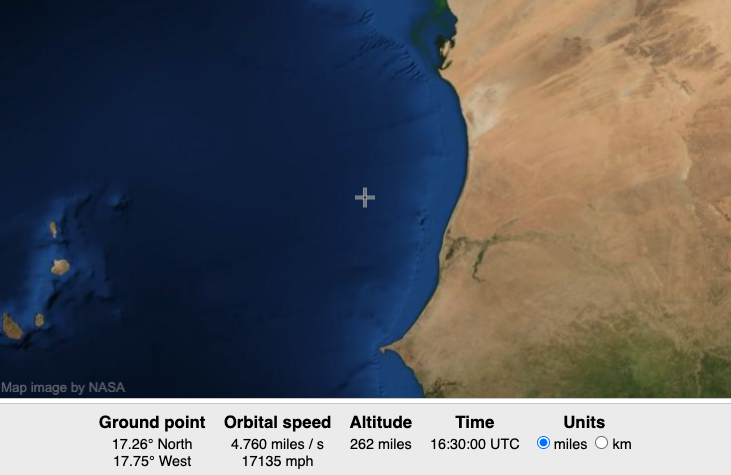

In [6]:
et = '2023-08-16 16:30:00'
lon = -17.75
lat = +17.26
alt = 262*1.60934 # km

In [7]:
r_earth_ecl = Geo2Ecliptic(lon, lat, alt, et)

In [10]:
r_earth_ecl

array([-6290.68777859,  -664.23310576,  2489.51523136])

In [8]:
r, lon_ecl, lat_ecl = spy.reclat(r_earth_ecl)
lon_ecl = np.mod(lon_ecl*rad,360)
lat_ecl = lat_ecl*rad

In [9]:
lon_ecl, lat_ecl

(186.02752122026976, 21.48252805092482)

### Coordenadas dadas por Horizons de la ISS

![Horizons table ISS](ISS.png)